<a href="https://colab.research.google.com/github/Brenda-Martinez-Martinez/Project_Spring_2025/blob/main/GPAwithXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Higher Education Students Performance Evaluation: Evaluating a Random Forest Model

In this lesson, you will evaluate the performance of a Random Forest classifier on the dataset. The goal is to understand key evaluation metrics: **confusion matrix**, **accuracy**, **precision**, **recall**, **F1 score**, and **AUC**.

## Step 1: Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

## Step 2: Load and Prepare Titanic Data

In [ ]:
# Load Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/Brenda-Martinez-Martinez/Project_Spring_2025/refs/heads/main/DATA%20(1).csv')


# Features and target
X = df[['17', '22', '23', '24', '25', '26']]
y = df['30']

## Step 3: Split the Data and Train the Model

In [ ]:
# edit this to work with the information
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]

## Step 4: Evaluate the Model

We will now look at several evaluation metrics and interpret them.
<p>Precision: Of all of the passengers we said would survive (or not), how many actually did?</p>
<p>Recall: Of all passengers who actually survived, how many did we correctly predict?</p>
<p>F1 Score: F1 Score tells you how well your model balances catching survivors (Recall) with not falsely assuming people survived (Precision).</p>
<p>Example:<br>
Imagine you're trying to predict who survived the Titanic:<br>

Precision = 0.8 → Of all people predicted to survive, 80% actually did.<br>

Recall = 0.6 → Of all people who actually survived, you found 60%.<br>
Accuracy: How often the model is right overall.<br></p>


In [ ]:
# Confusion matrix and classification report
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print labeled confusion matrix
print("Confusion Matrix:")
print("               Predicted")
print("              0        1")
print("Actual 0   {:<8} {:<8}".format(cm[0, 0], cm[0, 1]))
print("Actual 1   {:<8} {:<8}".format(cm[1, 0], cm[1, 1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'))

Confusion Matrix:
               Predicted
              0        1
Actual 0   0        0       
Actual 1   0        1       

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.11      0.14         9
           3       0.53      0.67      0.59        12
           4       0.50      0.57      0.53         7

    accuracy                           0.45        29
   macro avg       0.31      0.34      0.32        29
weighted avg       0.40      0.45      0.42        29

AUC Score: 0.5014705882352941


## Step 5: Plot the ROC Curve

## 🧠 What is the ROC Curve?

The **ROC Curve** (Receiver Operating Characteristic curve) is a graph that shows how well your model **separates** the two classes—like survivors vs. non-survivors.

---

### 📊 What’s on the axes?
- **X-axis**: False Positive Rate  
  (bad predictions where the model says “survived” but the person didn’t)
- **Y-axis**: True Positive Rate = **Recall**  
  (how many actual survivors the model correctly found)

---

### 💡 How it works:
The ROC curve shows how the model performs at **different thresholds** (cut-off points for saying “yes” or “no”).

> The curve starts in the bottom left (0,0) and moves toward the top right (1,1).  
> The **better the model**, the closer the curve hugs the **top-left corner**.

---

### 🏆 What is AUC?
- **AUC** = Area Under the Curve
- It’s a number between **0 and 1**
- **Closer to 1** = better model
- **0.5** = no better than guessing

---

### 🐳 Easy Analogy:
> Imagine a shark detector. The ROC curve tells you how well it can  
> **catch real sharks (true positives)** without mistaking  
> **dolphins for sharks (false positives).**

---

### 📌 Bottom Line:
> **The ROC curve helps you visualize how good your model is at telling one class from the other—especially when you change the decision threshold. A curve that bows up toward the top-left is what you want.**

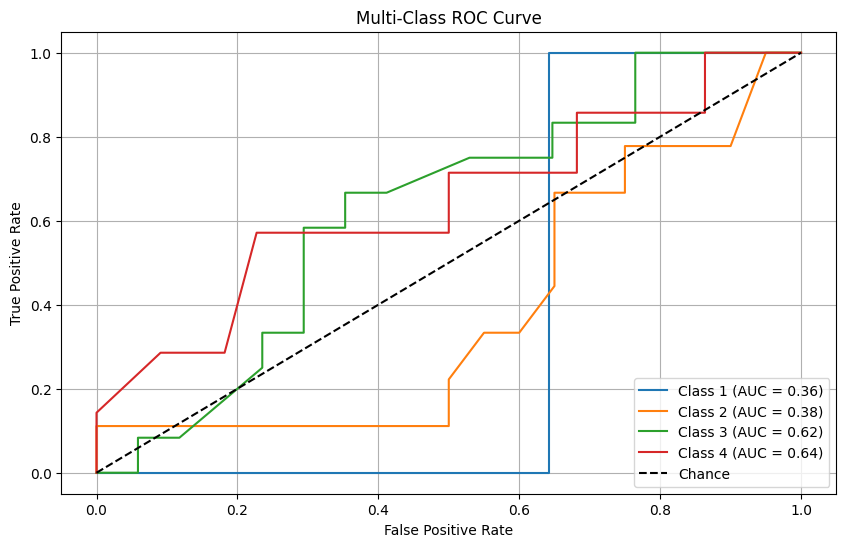

In [ ]:
# Binarize the test labels
classes = rf.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_test_bin is 2D
if y_test_bin.ndim == 1:
    y_test_bin = y_test_bin.reshape(-1, 1)

# Get class probabilities from model
y_probs = rf.predict_proba(X_test)

# Ensure y_probs is 2D
import numpy as np
if isinstance(y_probs, list):
    y_probs = np.column_stack(y_probs)
elif y_probs.ndim == 1:
    y_probs = y_probs.reshape(-1, 1)

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(classes)):
    if i >= y_probs.shape[1]:
        continue  # Skip if class not present
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 🧠 Step 6: Explainability - Partial Dependence Plots (XAI)

Partial Dependence Plots (PDPs) show how each feature (like age, fare, and sex) affects the model's prediction while averaging out the effects of other features. This helps us understand which variables influence survival predictions the most.

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

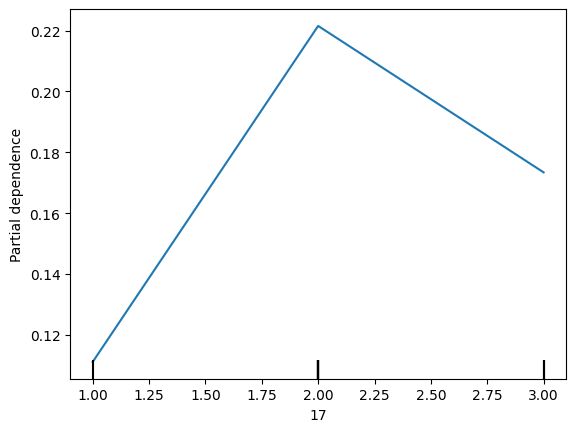

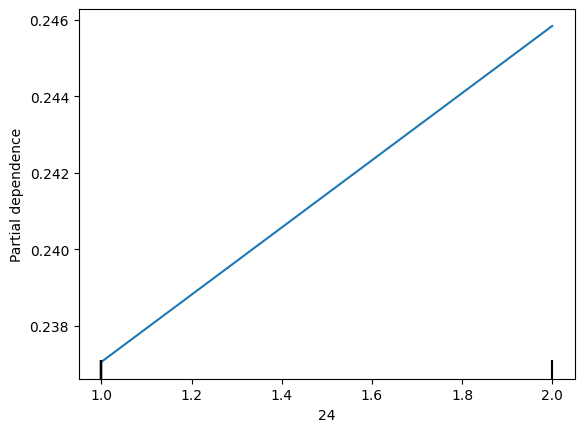

In [ ]:
# Partial Dependence for feature '30'
PartialDependenceDisplay.from_estimator(rf, X_test, ['17'], target=4)
plt.show()

# Partial Dependence for feature '17'
PartialDependenceDisplay.from_estimator(rf, X_test, ['24'], target=2)
plt.show()


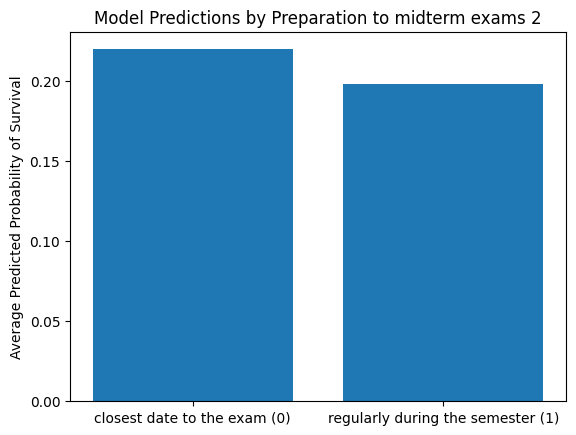

In [ ]:
# Another way to explain results
# binary features sometimes cause issues with PDP
# Group by 'sex' and calculate average prediction
X_test_with_probs = X_test.copy()
X_test_with_probs['predicted_prob'] = rf.predict_proba(X_test)[:, 1]
X_test_with_probs['24'] = X_test_with_probs['24'].astype(int)

Prep_means = X_test_with_probs.groupby('24')['predicted_prob'].mean()

# Plot
plt.bar(['closest date to the exam (0)', 'regularly during the semester (1)'], Prep_means)
plt.ylabel('Average Predicted Probability of Survival')
plt.title('Model Predictions by Preparation to midterm exams 2')
plt.show()

## Discussion Questions
- What do the values in the confusion matrix represent?
- If our goal is to **save as many lives as possible**, should we prioritize **precision** or **recall**?
- Can a model have high **accuracy** but still perform poorly?
- How does the **AUC** help us understand the model's performance?

## 🔍 Evaluation Questions & Answers

**Q1: What do the values in the confusion matrix represent?**  
- They show how many predictions were correct or incorrect:
  - **True Positives (TP)**: Correctly predicted survivors  
  - **True Negatives (TN)**: Correctly predicted non-survivors  
  - **False Positives (FP)**: Predicted survived, but didn’t  
  - **False Negatives (FN)**: Predicted didn’t survive, but did  

---

**Q2: If our goal is to save as many lives as possible, should we prioritize precision or recall?**  
- **Recall**, because we want to **catch as many actual survivors as possible**, even if we sometimes predict survival when it didn’t happen.

---

**Q3: Can a model have high accuracy but still perform poorly?**  
- **Yes.** If the data is **imbalanced**, a model can be accurate by always predicting the majority class but fail to detect the important minority cases.

---

**Q4: How does the AUC help us understand the model's performance?**  
- **AUC** (Area Under the ROC Curve) shows how well the model **distinguishes between classes**.  
  - **Closer to 1** = better performance  
  - **0.5** = no better than guessing